## Attempt 1

In [ ]:
# Import all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # to split the dataset into training and testing set
#To perform cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# Selecting approprite models for measuring performance
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold

# To create and select  Classifier model
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# To create and select Gradient boost classifier
from xgboost import XGBClassifier
# To create and select LigtGBM Classifier
from lightgbm import LGBMClassifier
# To make standardize our training and testing set
from sklearn.preprocessing import StandardScaler

In [ ]:
# retrieve the dataset and save to local machine
url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"
data = pd.read_csv(url)

In [ ]:
df = data
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
# Count the number of stabf in each category
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [ ]:
# Check missing values of each column
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [ ]:
# Check data types of all variables
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [ ]:
# Separate the target and feature variables
X = df.drop(columns =['stabf'])
y = df.stabf

In [ ]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [ ]:
# Count the value of y_train
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [ ]:
# define StandardScalar

scaler = StandardScaler()

# standardize the training data
standard_train_X = scaler.fit_transform(X_train)
standard_train_X = pd.DataFrame(standard_train_X, columns=X_train.columns)

In [ ]:
# standardize the test data
X_test = X_test.reset_index(drop=True)
standard_test_X = scaler.transform(X_test)
standard_test_X = pd.DataFrame(standard_test_X, columns=X_test.columns)

In [ ]:
standard_train_X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239,0.966192
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521,0.056564
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489,0.150532
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303,1.167671
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575,0.826921


In [ ]:
# Define the training model with function
def train_model(model, X_train = standard_train_X, y_train = y_train, X_test = standard_test_X):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    return classification_report(y_pred, y_test)
    

In [ ]:
# define the model
rfc = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=1)
lgbm = LGBMClassifier(random_state=1)
extc = ExtraTreesClassifier(random_state=1)

In [ ]:
# the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
    

In [ ]:
# Print accuracy of RandomForestlassifier in 4 DP
rfc.fit(standard_train_X, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=rfc.predict(standard_test_X))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9995


In [ ]:
# Print accuracy of XGBClassifier in 4 DP
xgb.fit(standard_train_X, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=xgb.predict(standard_test_X))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9995


In [ ]:
# Print accuracy of LGBMClassifier in 4 DP
lgbm.fit(standard_train_X, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm.predict(standard_test_X))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9965


In [ ]:
# Define Randomized Search Cross Validation 
rsearch = RandomizedSearchCV(extc, hyperparameter_grid, random_state=1)

In [ ]:
# Printing the Classification report of each model
print("Classification Report using RandomForestClassifier \n", train_model(rfc))
print("Classification Report using ExtraTreesClassifier \n", train_model(extc))
print("Classification Report using XGBClassifier \n", train_model(xgb))
print("Classification Report using LGBMClassifier \n", train_model(lgbm))
print("Classification Report using RandomizedSearchCV \n", train_model(rsearch))

Classification Report using RandomForestClassifier 
               precision    recall  f1-score   support

      stable       1.00      1.00      1.00       713
    unstable       1.00      1.00      1.00      1287

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Classification Report using ExtraTreesClassifier 
               precision    recall  f1-score   support

      stable       0.98      0.99      0.98       701
    unstable       1.00      0.99      0.99      1299

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Classification Report using XGBClassifier 
               precision    recall  f1-score   support

      stable       1.00      1.00      1.00       713
    unstable       1.00      1.00      1.00      1287

    accuracy                      

In [ ]:
# Define confusion metrix
def make_confusion_matrix(model, X_train = standard_train_X, X_test=standard_test_X, y_test = y_test, labels = ['stable', 'unstable']):
    new_pred = model.predict(X_test)
    cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_pred, labels=labels)
    return cnf_mat

In [ ]:
# Printing out confusion matrix of all the models
print("Confusion Matrix using RandomForestClassifier \n", make_confusion_matrix(rfc))
print("Confusion Matrix using ExtraTreesClassifier \n", make_confusion_matrix(extc))
print("Confusion Matrix using XGBClassifier \n", make_confusion_matrix(xgb))
print("Confusion Matrix using LGBMClassifier \n", make_confusion_matrix(lgbm))
print("Confusion Matrix using RandomizedSearchCV \n", make_confusion_matrix(rsearch))


Confusion Matrix using RandomForestClassifier 
 [[ 712    0]
 [   1 1287]]
Confusion Matrix using ExtraTreesClassifier 
 [[ 695   17]
 [   6 1282]]
Confusion Matrix using XGBClassifier 
 [[ 712    0]
 [   1 1287]]
Confusion Matrix using LGBMClassifier 
 [[ 710    2]
 [   5 1283]]
Confusion Matrix using RandomizedSearchCV 
 [[ 712    0]
 [   0 1288]]


In [ ]:
# define cross_val_score
def cross_val(model,X_train = standard_train_X, X_test = standard_test_X, y_train=y_train ):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    return scores.mean()*100

In [ ]:
print("Cross val score of RandomClassifier \n", cross_val(rfc))
print("Cross val score of ExtraTreesClassifier \n", cross_val(extc))
print("Cross val score of XGBClassifier \n", cross_val(xgb))
print("Cross val score of LGBMClassifier \n", cross_val(lgbm))
#print("Cross val score of RandomizedSearchCV \n", cross_val(rsearch))

Cross val score of RandomClassifier 
 99.9594968703347
Cross val score of ExtraTreesClassifier 
 99.1745924157318
Cross val score of XGBClassifier 
 99.97301449964667
Cross val score of LGBMClassifier 
 99.87856969883808


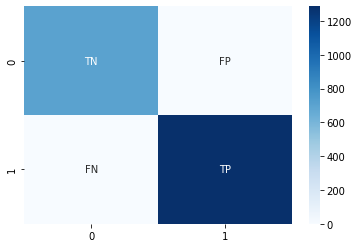

In [ ]:
# This is the confusion matrix heatmap representation of RandomForestClassifier 
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(make_confusion_matrix(rfc), annot=labels, fmt='', cmap='Blues')

In [ ]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier() 

# Training the model 
extra_tree_forest.fit(standard_train_X, y_train) 

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison of different Feature Importances')

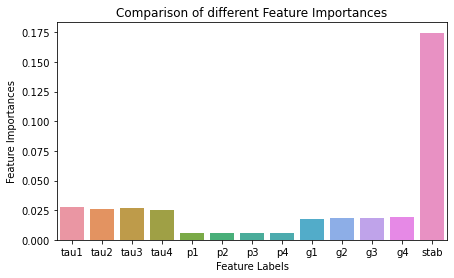

In [ ]:
# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(7, 4))
sns.barplot(standard_train_X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances')  